# <center><strong> Bike rental </strong></center>

###### **By Mohamed Jamyl**

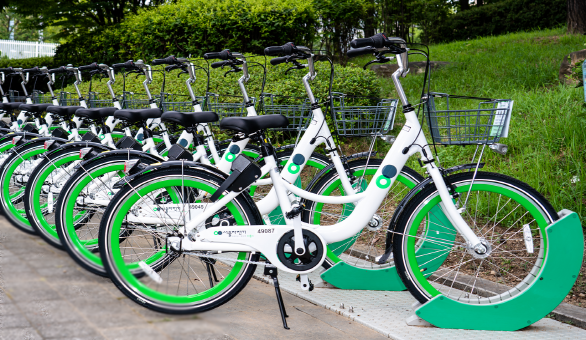

In [158]:
from IPython.display import Image
Image(filename='bi.png')

## <center><strong> Project Overview </strong></center>

### Bike share systems are a way to rent bikes where the process of obtaining membership, renting and returning bikes is automated through a network of kiosks located throughout the city. Through these systems, people can rent a bike from one location and return it to another location based on their needs. Currently, there are more than 500 bike share programs around the world.

---------------------------------
---------------------------------
---------------------------------

## **Import Libraries** 

In [ ]:
# import pylab
# import calendar

# import numpy as np
# import pandas as pd
# import seaborn as sns
# from scipy import stats
# import math
# from datetime import datetime
# import matplotlib.pyplot as plt
# import warnings


# pd.options.mode.chained_assignment = None
# warnings.filterwarnings("ignore", category=DeprecationWarning)

----------------------------------
----------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [1]:
from pandas import read_csv

df = read_csv("vlib.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
df.shape

(10886, 12)

In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
df.rename(columns={'casual': 'non-subscribed_users', 
                   'registered':'subscribed_users', 
                   'count': 'number_of_users', 
                   'temp':'Actual_Temperature', 
                   'atemp':'Feels_Like_Temperature'} ,inplace=True)

In [5]:
df

,datetime,season,holiday,workingday,weather,Actual_Temperature,Feels_Like_Temperature,humidity,windspeed,non-subscribed_users,subscribed_users,number_of_users
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                10886 non-null  object 
 1   season                  10886 non-null  int64  
 2   holiday                 10886 non-null  int64  
 3   workingday              10886 non-null  int64  
 4   weather                 10886 non-null  int64  
 5   Actual_Temperature      10886 non-null  float64
 6   Feels_Like_Temperature  10886 non-null  float64
 7   humidity                10886 non-null  int64  
 8   windspeed               10886 non-null  float64
 9   non-subscribed_users    10886 non-null  int64  
 10  subscribed_users        10886 non-null  int64  
 11  number_of_users         10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.isnull().sum()

datetime                  0
season                    0
holiday                   0
workingday                0
weather                   0
Actual_Temperature        0
Feels_Like_Temperature    0
humidity                  0
windspeed                 0
non-subscribed_users      0
subscribed_users          0
number_of_users           0
dtype: int64

In [8]:
df.duplicated().sum()

0

-----------------------
-----------------------

### **Basic Statistical Overview**

---------------------------------

- Summary Statistical : **describe()**

In [9]:
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False).style.background_gradient(cmap='GnBu').bar(subset=["max"], color='#BB0000').bar(subset=["mean",], color='green') 

,count,mean,std,min,25%,50%,75%,max
subscribed_users,10886.000000,155.552177,151.039033,0.000000,36.000000,118.000000,222.000000,886.000000
non-subscribed_users,10886.000000,36.021955,49.960477,0.000000,4.000000,17.000000,49.000000,367.000000
humidity,10886.000000,61.886460,19.245033,0.000000,47.000000,62.000000,77.000000,100.000000
Feels_Like_Temperature,10886.000000,23.655084,8.474601,0.760000,16.665000,24.240000,31.060000,45.455000
windspeed,10886.000000,12.799395,8.164537,0.000000,7.001500,12.998000,16.997900,56.996900
Actual_Temperature,10886.000000,20.230860,7.791590,0.820000,13.940000,20.500000,26.240000,41.000000
season,10886.000000,2.506614,1.116174,1.000000,2.000000,3.000000,4.000000,4.000000
weather,10886.000000,1.418427,0.633839,1.000000,1.000000,1.000000,2.000000,4.000000
workingday,10886.000000,0.680875,0.466159,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,10886.000000,0.028569,0.166599,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
df.select_dtypes(include='object').describe()

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


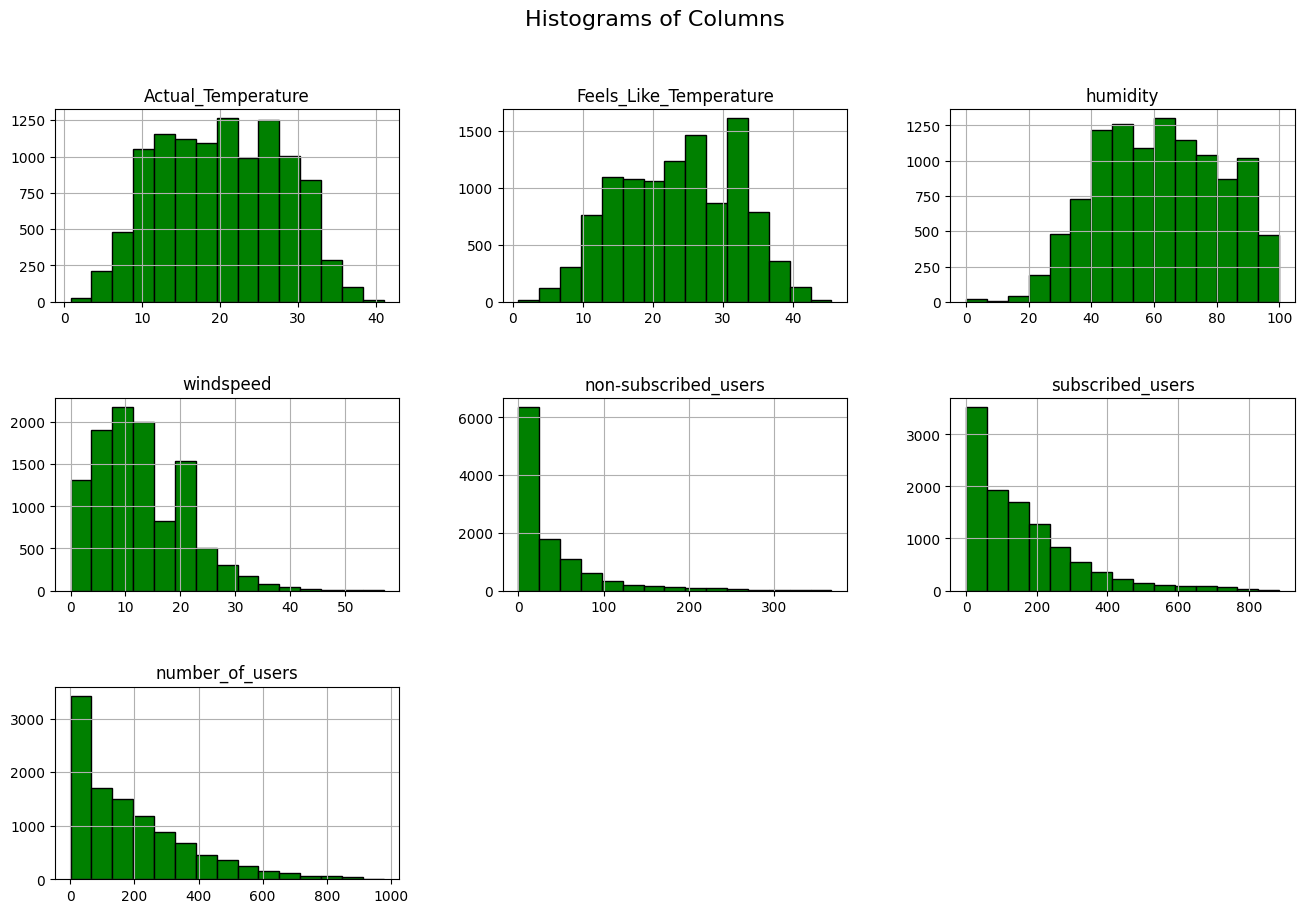

In [11]:
from matplotlib.pyplot import hist, suptitle, subplots_adjust, show

df.drop(['datetime','season','holiday','workingday','weather'],axis=1).hist(bins=15, figsize=(16, 10), color='green', edgecolor='black')

# Set titles and labels for each subplot
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  # Add space between plots
show()

-----------------------

- Summary Statistical : **value_counts()**

In [12]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

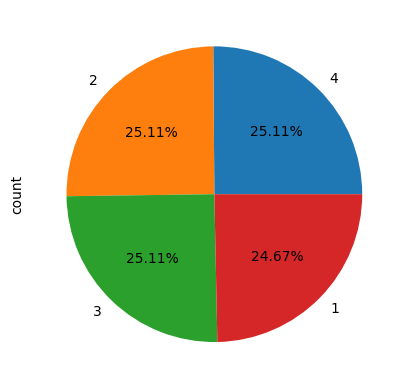

In [13]:
df['season'].value_counts().plot.pie(autopct='%0.2f%%')
show()

--------------------------

In [14]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

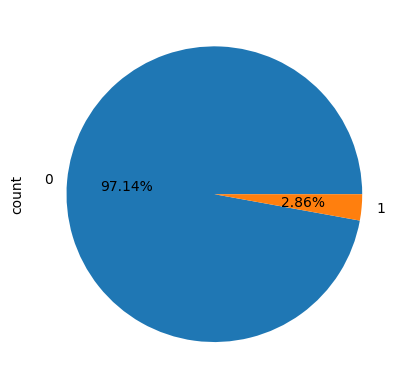

In [15]:
df['holiday'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-------------------


In [16]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

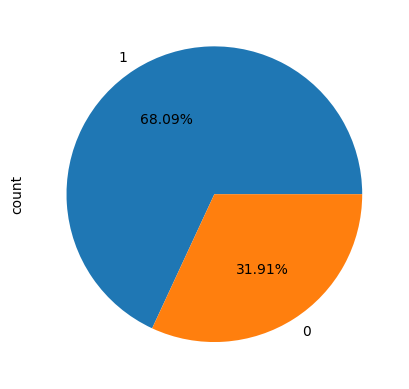

In [18]:
df['workingday'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-----------------------

In [19]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

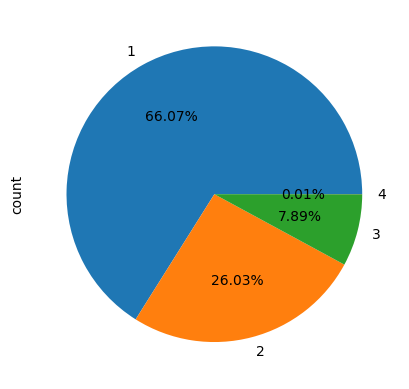

In [20]:
df['weather'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------
----------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

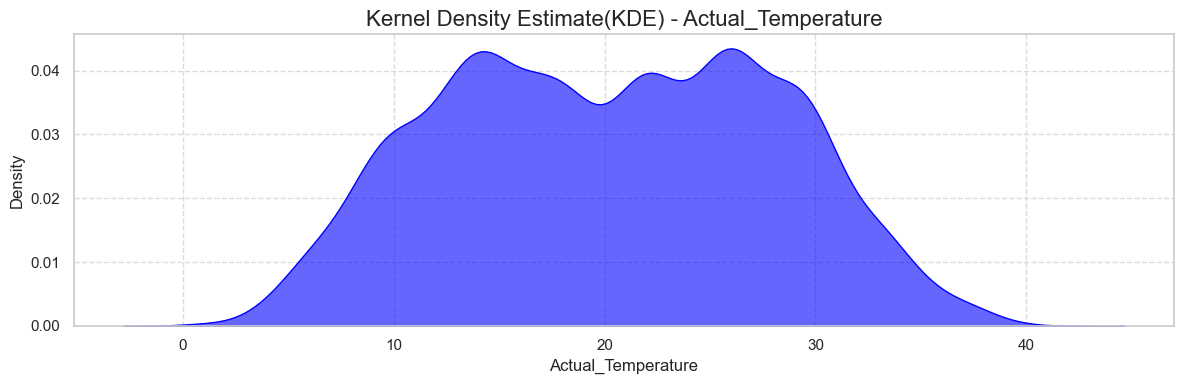

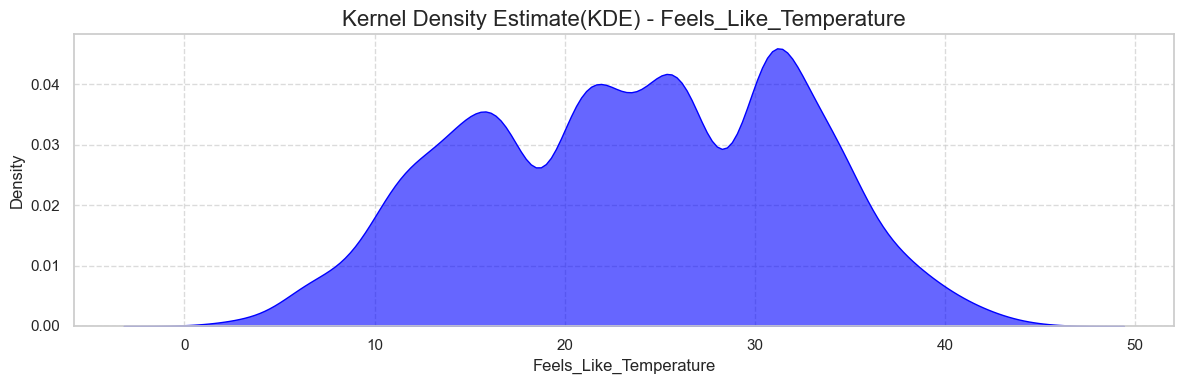

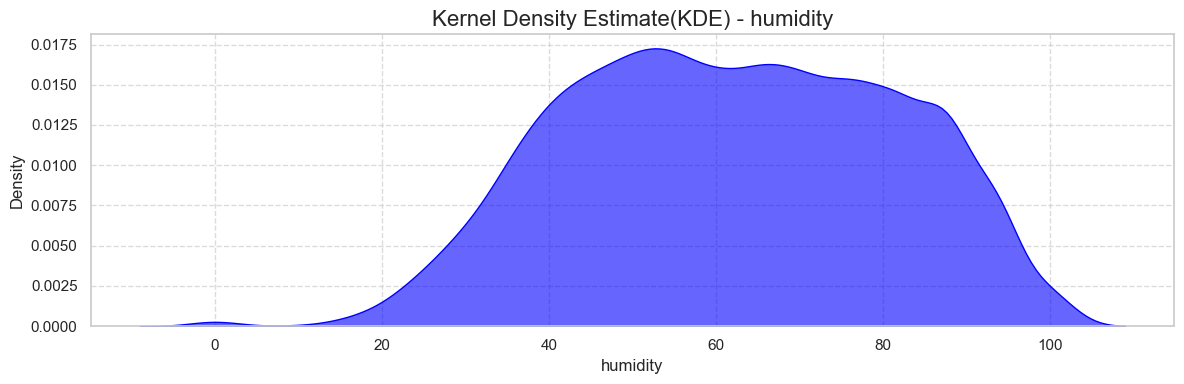

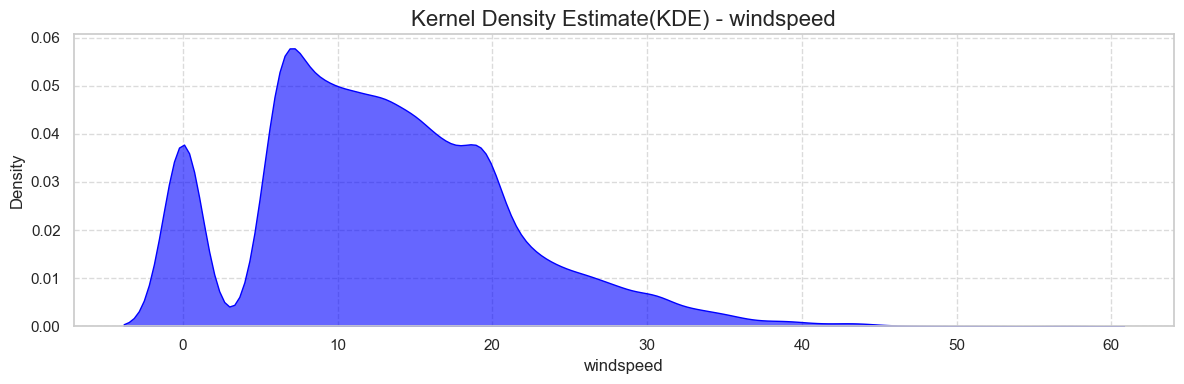

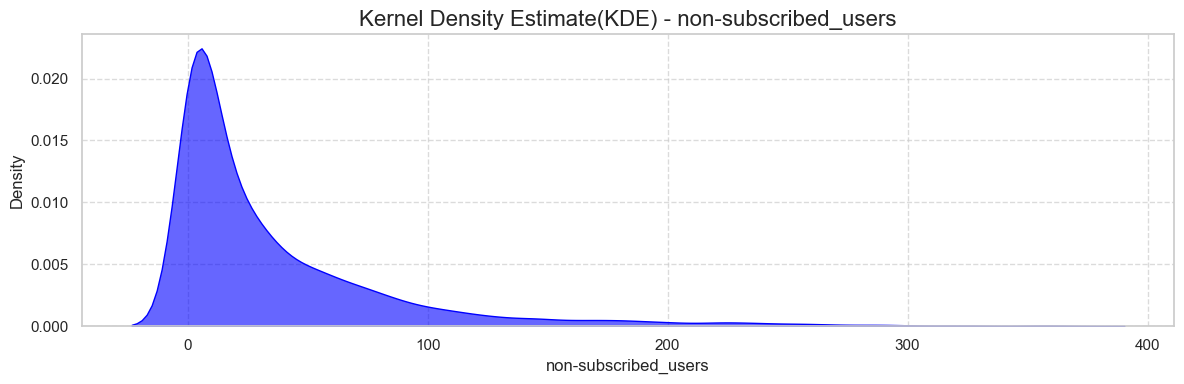

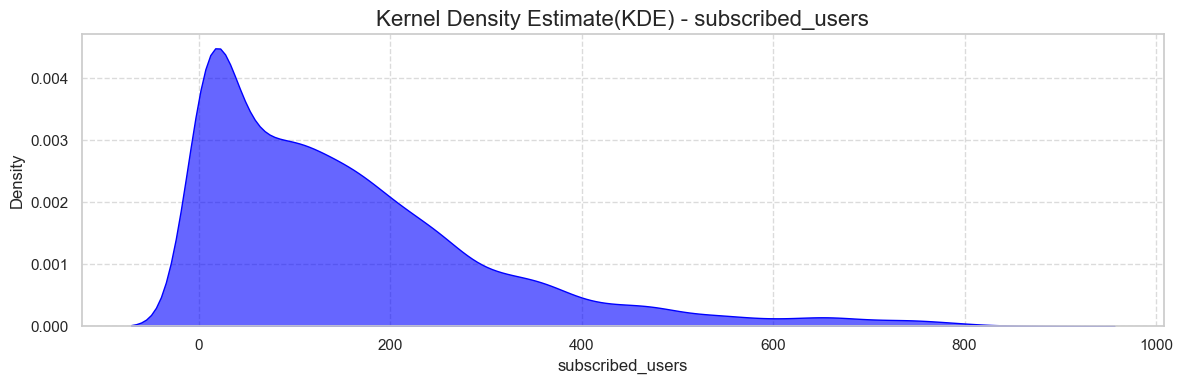

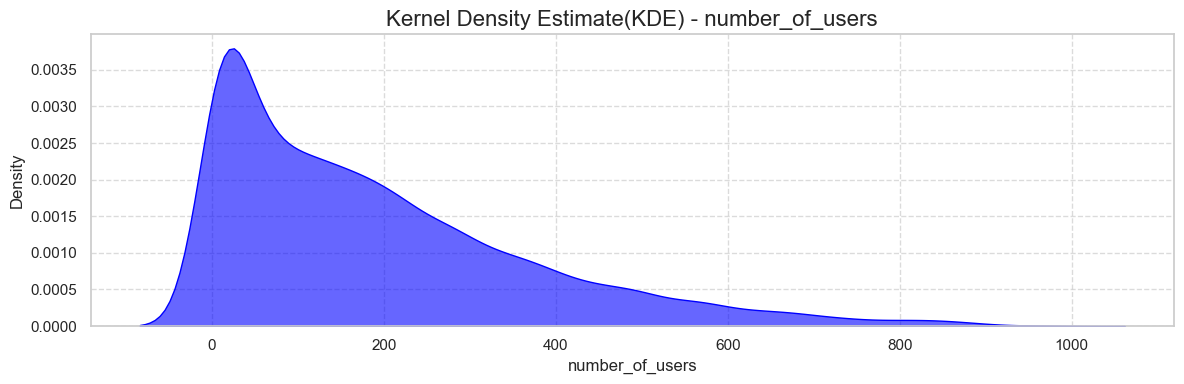

In [21]:
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, tight_layout
from seaborn import set, kdeplot
set(style="whitegrid")
for	col	in df.drop(['datetime','season','holiday','workingday','weather'],axis=1).select_dtypes('number').columns:
    figure(figsize=(12,	4))
    kdeplot(df[col], fill=True,	color='blue', alpha=0.6)
    title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    xlabel(col,	fontsize=12)
    ylabel('Density', fontsize=12)
    grid(True, linestyle='--', alpha=0.7)
    tight_layout()
    show()

----------------------------

### **Correlation**

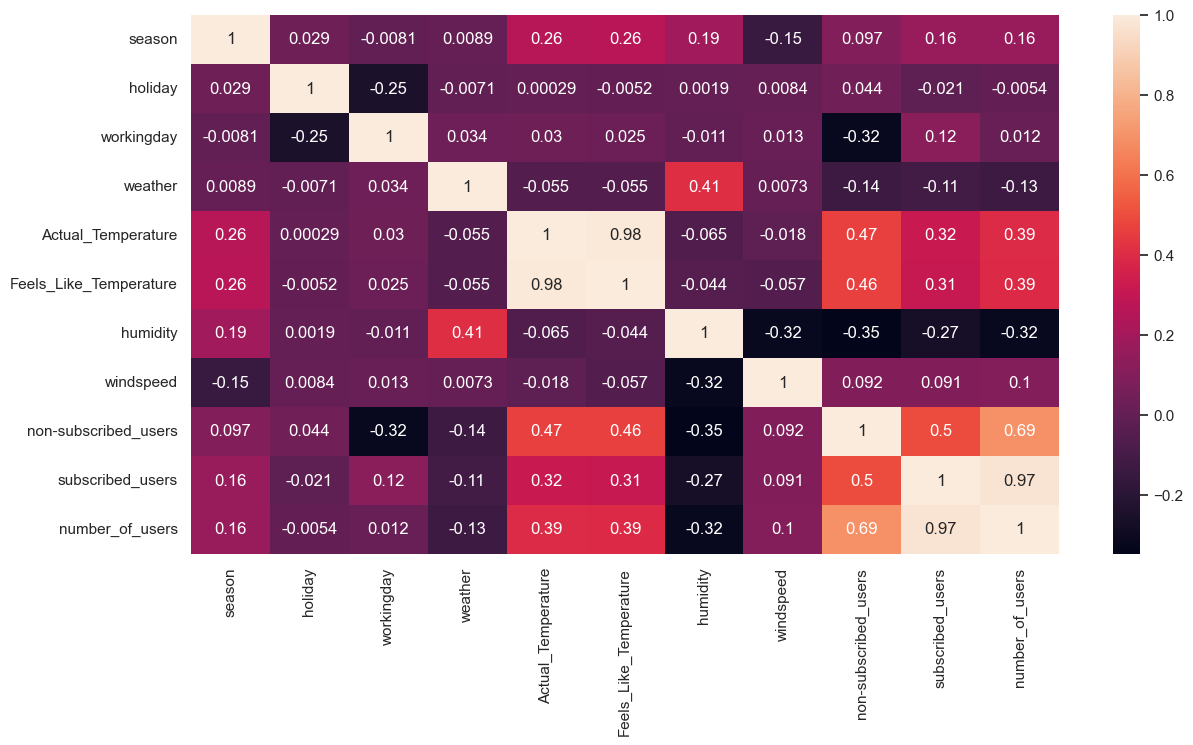

In [22]:
from seaborn import heatmap

figure(figsize=(14,	7))
heatmap(df.select_dtypes(include='number').corr(), annot=True)
show()


##### There is a high positive correlation (0.97) between **subscribed_users** and **number_of_users**

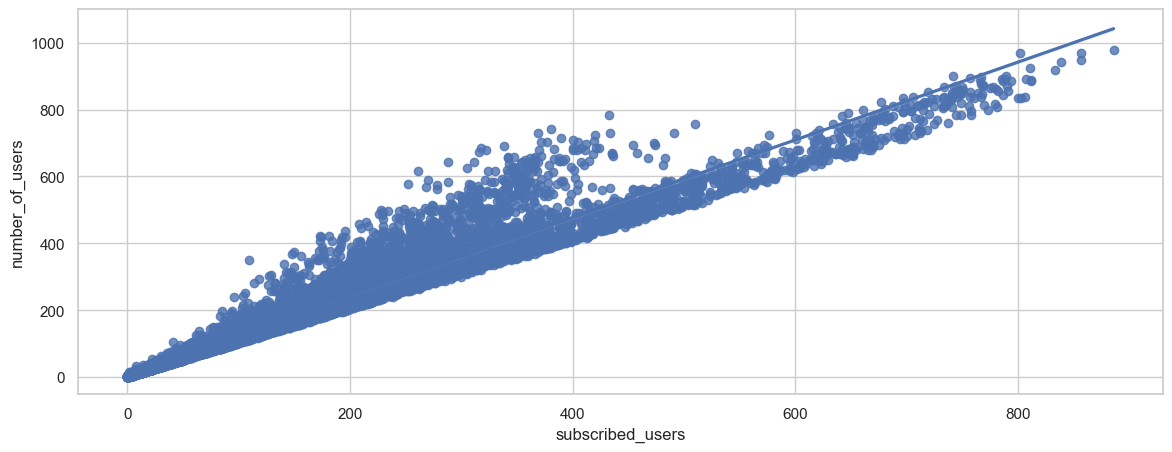

In [23]:
from matplotlib.pyplot import subplots
from seaborn import regplot 

fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="subscribed_users", y="number_of_users", data=df,ax=ax)
show()

-----------------------

##### There is a high positive correlation (0.69) between **casual** and **count**

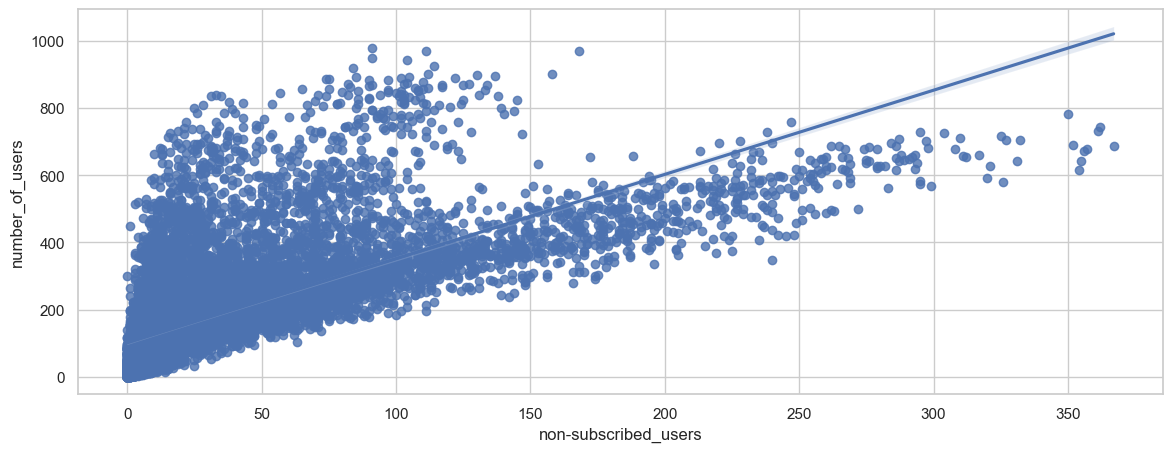

In [24]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="non-subscribed_users", y="number_of_users", data=df,ax=ax)
show()

--------------------

##### There is a high positive correlation (0.98) between **Actual_Temperature** and **Feels_Like_Temperature**

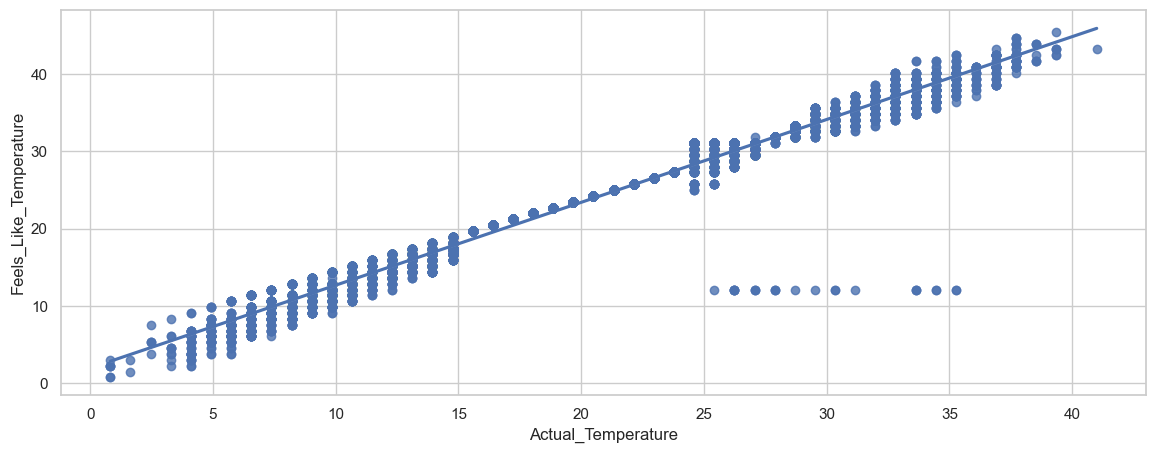

In [25]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="Actual_Temperature", y="Feels_Like_Temperature", data=df,ax=ax)
show()

-------------------------
-------------------------

## **Feature Extraction**

----------------------------

#### Extracting new column **[date]** from **[datetime]**

In [26]:
"2011-01-01 00:00:00".split()

['2011-01-01', '00:00:00']

In [27]:
df['datetime'][0].split()

['2011-01-01', '00:00:00']

In [28]:
df['datetime'][0].split()[0]

'2011-01-01'

In [29]:
df["date"] = df['datetime'].apply(lambda x : x.split()[0])

In [30]:
df['date'].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

--------------------

#### Extracting new column **[time]** from **[dateime]**

In [191]:
df['datetime'][0].split()

['2011-01-01', '00:00:00']

In [192]:
df['datetime'][0].split()[1]

'00:00:00'

In [31]:
df['time'] = df['datetime'].apply(lambda x : x.split()[1])

In [32]:
df['time'].head()

0    00:00:00
1    01:00:00
2    02:00:00
3    03:00:00
4    04:00:00
Name: time, dtype: object

-------------------------------------

#### Extracting new column **[year]** from **[date]**

In [33]:
df['date'][0].split()[0]

'2011-01-01'

In [34]:
df['date'][0].split()[0].split('-')[0]

'2011'

In [35]:
df['year'] =df['date'].apply(lambda x : x.split()[0].split('-')[0])

In [36]:
df['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_13996\886983786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='year', data=df, palette=['green','red'])


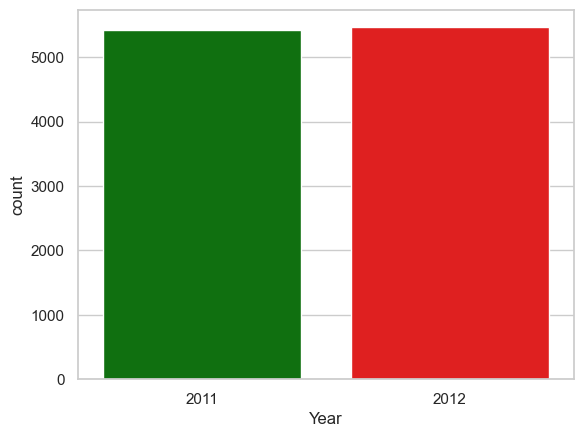

In [37]:
from seaborn import countplot

countplot(x='year', data=df, palette=['green','red'])
xlabel('Year')
show()

-------------------------------

#### Extracting new column **[month]** from **[date]**

In [38]:
df['date'][0].split()[0].split('-')[1]

'01'

In [39]:
from datetime import datetime
import calendar

df['date'].apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

0         January
1         January
2         January
3         January
4         January
           ...   
10881    December
10882    December
10883    December
10884    December
10885    December
Name: date, Length: 10886, dtype: object

In [40]:
df["month"] = df['date'].apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

In [41]:
df['month'].head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

In [42]:
df['month'].value_counts()

month
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

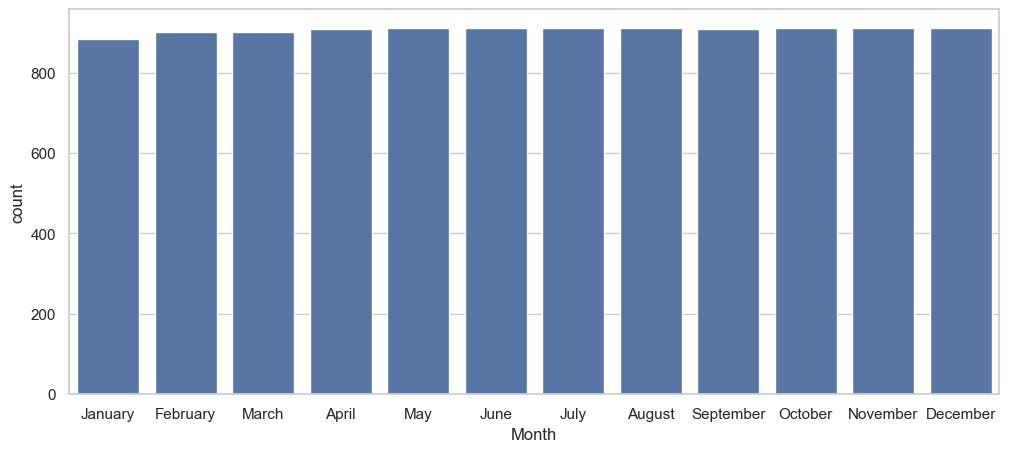

In [43]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='month', data=df)
xlabel('Month')
show()

------------------------

#### Extracting new column **[day]** from **[date]**

In [44]:
df['date'][0].split()[0].split('-')[2]

'01'

In [45]:
df['date'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: date, Length: 10886, dtype: object

In [46]:
df["day"] = df['date'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

In [47]:
df["day"].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: day, dtype: object

In [48]:
df["day"].value_counts()

day
Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: count, dtype: int64

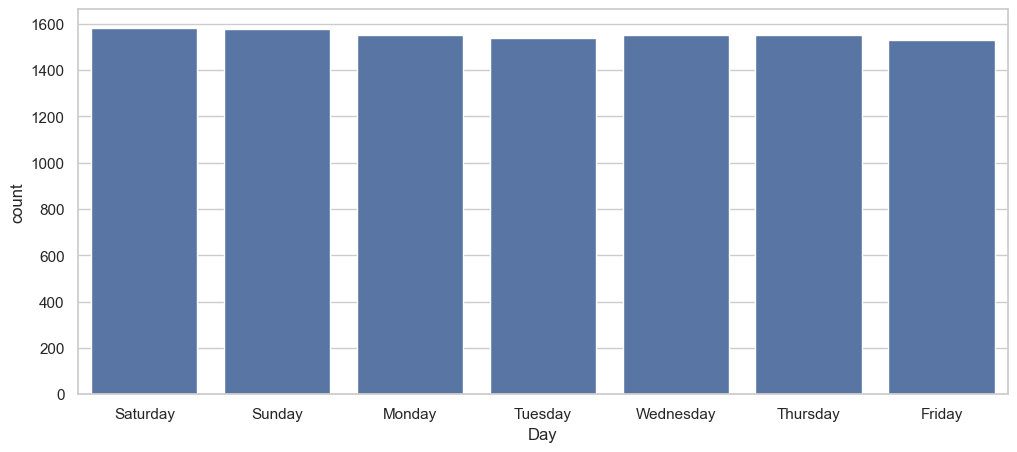

In [49]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='day', data=df)
xlabel('Day')
show()

------------------------

#### Extracting new column **[weekend]** from **[day]**

In [50]:
def WeekEnd(day):
    day = str(day)
    if day == 'Saturday' or day == 'Sunday':
        return 'Weekend'
    else:
        return 'No'

df['weekend'] = df['day'].apply(lambda x : WeekEnd(x))

In [51]:
df['weekend'].value_counts()

weekend
No         7723
Weekend    3163
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_13996\565876869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='weekend', data=df, palette=['green','red'])


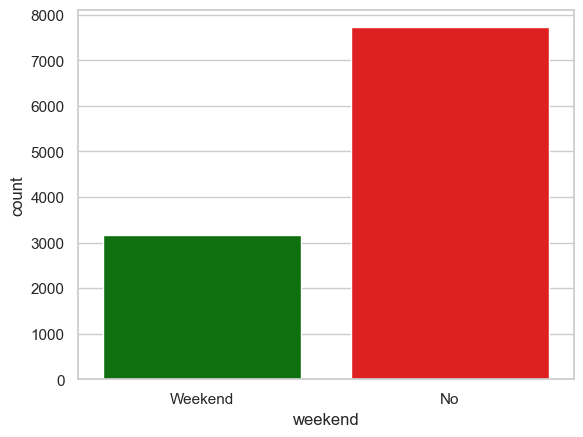

In [52]:
countplot(x='weekend', data=df, palette=['green','red'])
show()

------------------------

#### Extracting new column **[hour]** from **[time]**

In [53]:
df['time'][0]

'00:00:00'

In [54]:
df['time'][0].split(':')[0]

'00'

In [55]:
df['time'].apply(lambda x : x.split(":")[0])

0        00
1        01
2        02
3        03
4        04
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: time, Length: 10886, dtype: object

In [56]:
df["hour"] = df['time'].apply(lambda x : x.split(":")[0])

In [57]:
df['hour'].value_counts()

hour
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
09    455
08    455
07    455
06    455
00    455
01    454
05    452
02    448
04    442
03    433
Name: count, dtype: int64

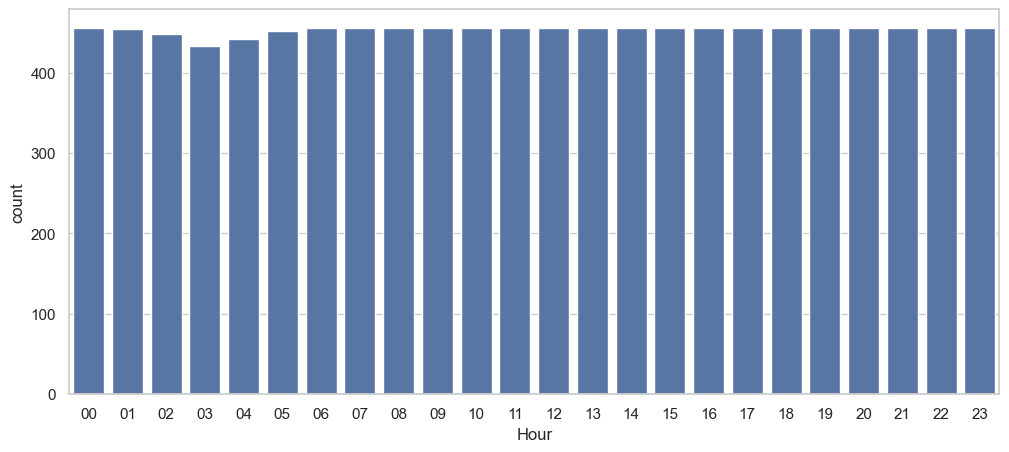

In [58]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='hour', data=df)
xlabel('Hour')
show()

------------------------

#### Extracting new column **[the_usual_time_periods_per_day]** from **[hour]**

In [59]:
df['hour'] = df['hour'].astype(int)

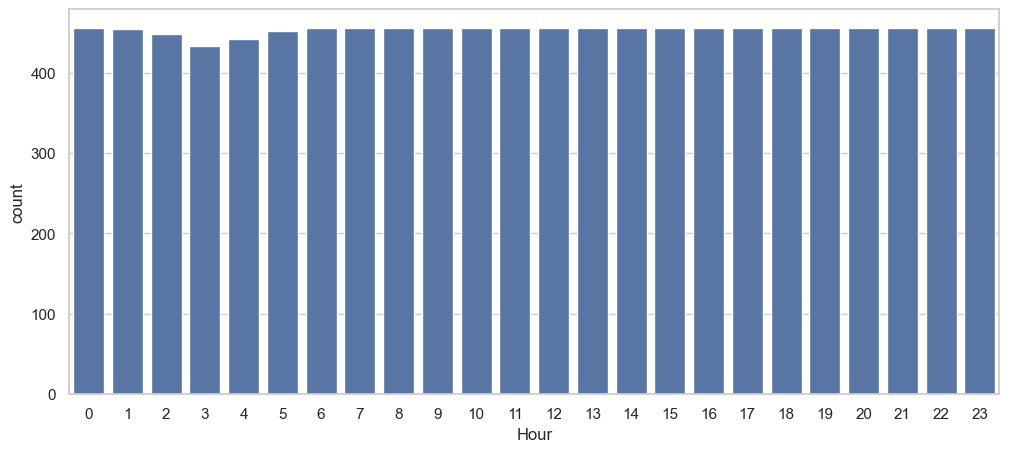

In [60]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='hour', data=df)
xlabel('Hour')
show()

In [61]:
def TheUsualTimePeriodsPerDay(hour):
    hour = int(hour)
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 13:
        return 'Midday/Noon'
    elif 14 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 20:
        return 'Evening'
    elif 21 <= hour <= 23:
        return 'Night'
    else: # 0 <= hour <= 5
        return 'Midnight and After'

df['the_usual_time_periods_per_day'] = df['hour'].apply(lambda x : TheUsualTimePeriodsPerDay(x))

In [62]:
df['the_usual_time_periods_per_day'].value_counts()

the_usual_time_periods_per_day
Morning               2730
Midnight and After    2684
Afternoon             1824
Evening               1368
Night                 1368
Midday/Noon            912
Name: count, dtype: int64

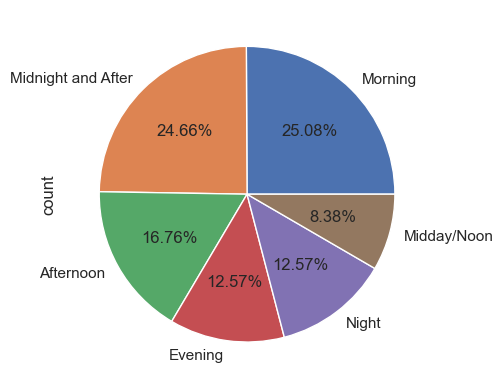

In [63]:
df['the_usual_time_periods_per_day'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-----------------------

#### Extracting new column **[weather_feeling]** from **[Feels_Like_Temperature]**

In [64]:
df['Feels_Like_Temperature'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [65]:
def classify_temperature(FeelsLikeTemperature):
    
    if FeelsLikeTemperature < 0:
        return 'Freezing Cold'
    elif FeelsLikeTemperature < 11:
        return 'Cold'
    elif FeelsLikeTemperature < 21:
        return 'Cool'
    elif FeelsLikeTemperature < 26:
        return 'Mild'
    elif FeelsLikeTemperature < 31:
        return 'Warm'
    elif FeelsLikeTemperature < 36:
        return 'Hot'
    else:
        return 'Extremely Hot'

df['weather_feeling'] = df['Feels_Like_Temperature'].apply(lambda x : classify_temperature(x))

In [66]:
df['weather_feeling'].value_counts()

weather_feeling
Cool             3329
Mild             2375
Hot              2272
Warm             1539
Cold              743
Extremely Hot     628
Name: count, dtype: int64

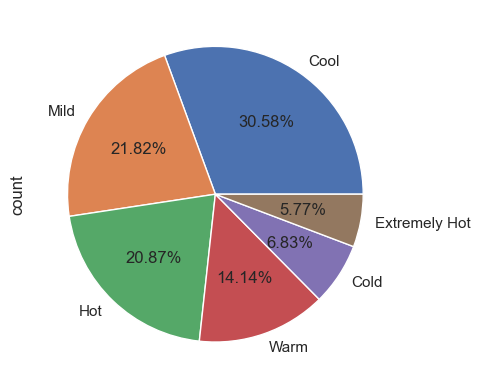

In [67]:
df['weather_feeling'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

#### Mapping **season column**

In [68]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [69]:
dictionnaire_saisons = {1 :"Winter" , 2: "Spring", 3 : "Summer", 4 : "Fall"}
df["season"] = df["season"].map(dictionnaire_saisons)


In [70]:
df['season'].value_counts()

season
Fall      2734
Spring    2733
Summer    2733
Winter    2686
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_13996\2074212223.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='season', data=df, palette=['green','red','yellow','blue'])


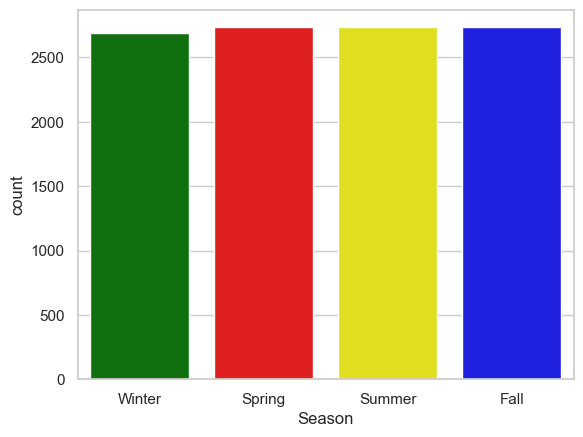

In [71]:
countplot(x='season', data=df, palette=['green','red','yellow','blue'])
xlabel('Season')
show()

----------------------------------

#### Mapping **weather column**

##### Clear + Few clouds + Partly cloudy + Partly cloudy ----> **Clear to Partly Cloudy**
##### Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ----> **Mist and Cloudy**
##### Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" ----> **Light Precipitation**
##### Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ----> **Severe Weather**

In [72]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [73]:
df["weather"] = df["weather"].map({1: "Clear to Partly Cloudy",\
                                        2 : "Mist and Cloudy", \
                                        3 : "Light Precipitation", \
                                        4 :"Severe Weather" })

C:\Users\RPC\AppData\Local\Temp\ipykernel_13996\3207305020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='weather', data=df, palette=['green','red','yellow','blue'])


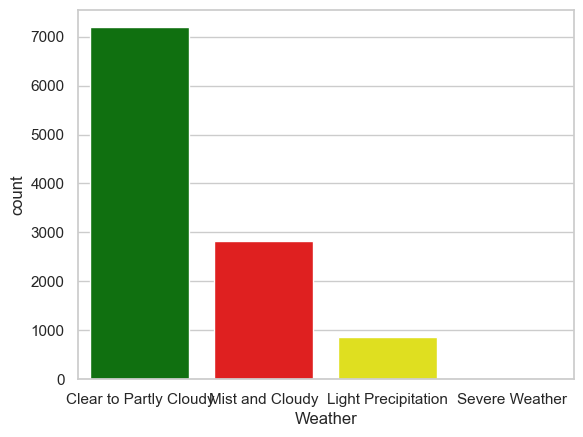

In [74]:
countplot(x='weather', data=df, palette=['green','red','yellow','blue'])
xlabel('Weather')
show()

---------------------------
--------------------------

## **Detect Outliers**

In [75]:
df[['non-subscribed_users','subscribed_users','number_of_users']].describe()

,non-subscribed_users,subscribed_users,number_of_users
count,10886.000000,10886.000000,10886.000000
mean,36.021955,155.552177,191.574132
std,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000
25%,4.000000,36.000000,42.000000
50%,17.000000,118.000000,145.000000
75%,49.000000,222.000000,284.000000
max,367.000000,886.000000,977.000000


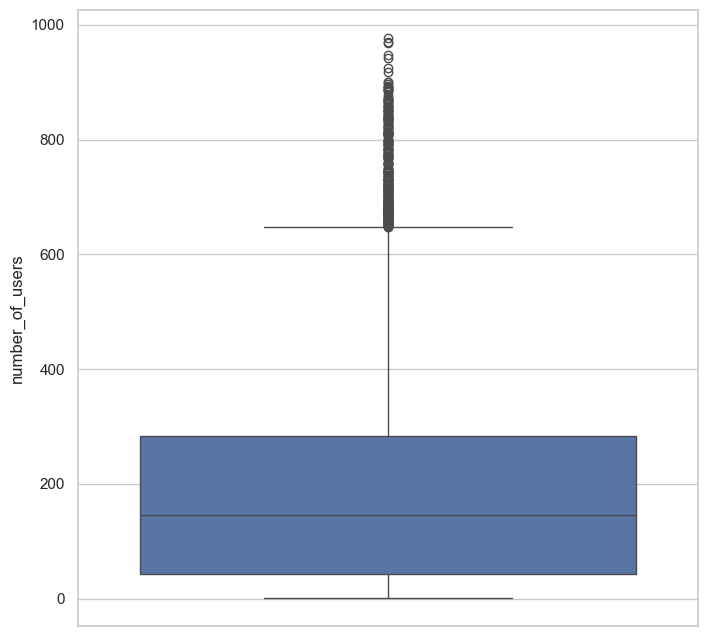

In [77]:
from seaborn import boxplot

fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
boxplot(data=df,y="number_of_users",orient="v",ax=axes)
show()

In [78]:
numerical_data=df[['non-subscribed_users','subscribed_users','number_of_users']]
for column in numerical_data.columns:
    Q1=numerical_data[column].quantile(0.25)
    Q3=numerical_data[column].quantile(0.75)
    IQR = Q3-Q1

    Lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR

    outliers = ((numerical_data[column]>Upper_bound)|(numerical_data[column]<Lower_bound)).sum()
    Total = numerical_data[column].shape[0]
    print(f'Total of outliers in {column} are   :   {outliers}--{round(100*(outliers)/Total,2)}%')
        
    if outliers > 0:
        df=df.loc[(df[column] <= Upper_bound) & (df[column] >= Lower_bound)]

Total of outliers in non-subscribed_users are   :   749--6.88%
Total of outliers in subscribed_users are   :   423--3.89%
Total of outliers in number_of_users are   :   300--2.76%


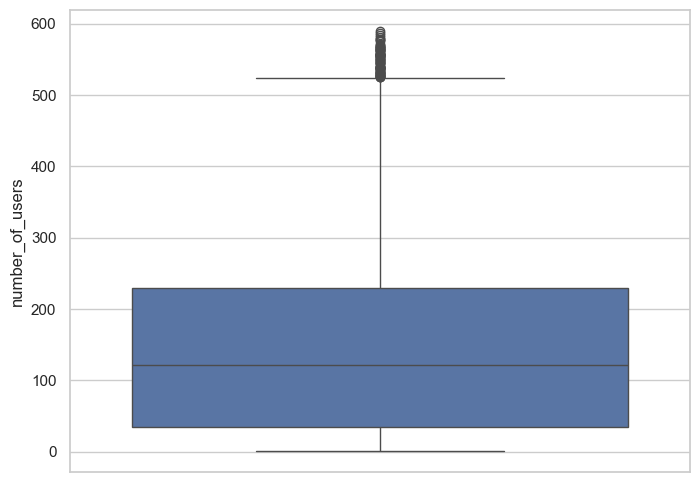

In [79]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 6)
boxplot(data=df,y="number_of_users",orient="v",ax=axes)
show()

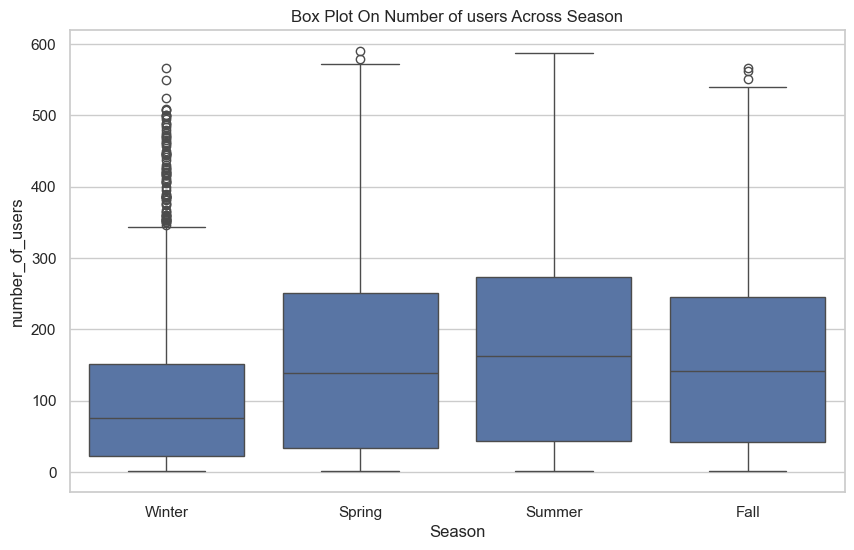

In [81]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 6)
boxplot(data=df,y="number_of_users",x="season",orient="v",ax=axes)
axes.set(xlabel='Season', ylabel='number_of_users',title="Box Plot On Number of users Across Season")
show()

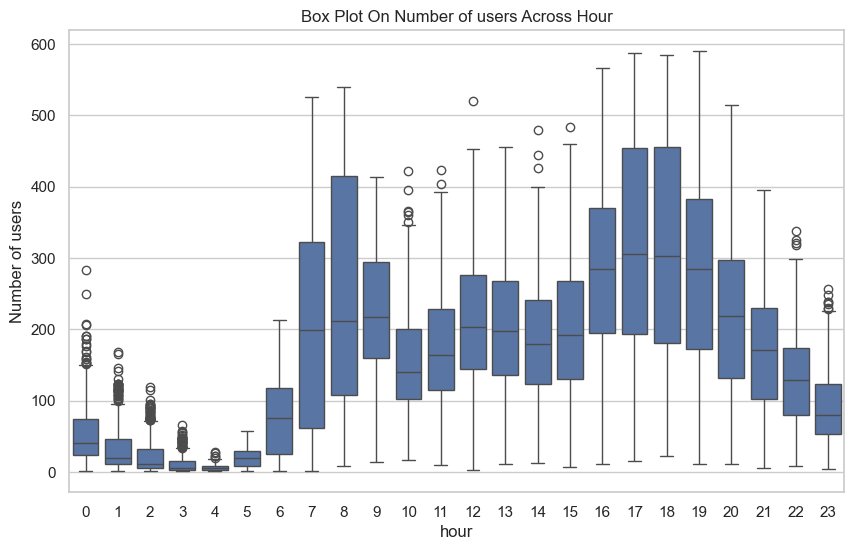

In [82]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 6)
boxplot(data=df,y="number_of_users",x="hour",orient="v",ax=axes)
axes.set(xlabel='hour', ylabel='Number of users',title="Box Plot On Number of users Across Hour")
show()

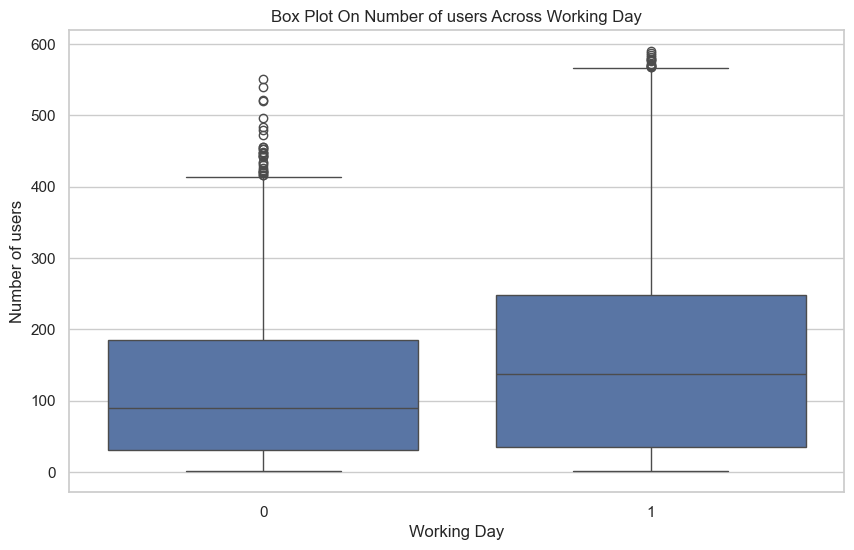

In [83]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 6)
boxplot(data=df,y="number_of_users",x="workingday",orient="v",ax=axes)
axes.set(xlabel='Working Day', ylabel='Number of users',title="Box Plot On Number of users Across Working Day")
show()

---------------------------------
--------------------------------

## **Analysis**

--------------------------------

- **Visualisation of continuous features vs Number of users**

In [84]:
df.head()

,datetime,season,holiday,workingday,weather,Actual_Temperature,Feels_Like_Temperature,humidity,windspeed,non-subscribed_users,...,number_of_users,date,time,year,month,day,weekend,hour,the_usual_time_periods_per_day,weather_feeling
0,2011-01-01 00:00:00,Winter,0,0,Clear to Partly Cloudy,9.84,14.395,81,0.0,3,...,16,2011-01-01,00:00:00,2011,January,Saturday,Weekend,0,Midnight and After,Cool
1,2011-01-01 01:00:00,Winter,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0,8,...,40,2011-01-01,01:00:00,2011,January,Saturday,Weekend,1,Midnight and After,Cool
2,2011-01-01 02:00:00,Winter,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0,5,...,32,2011-01-01,02:00:00,2011,January,Saturday,Weekend,2,Midnight and After,Cool
3,2011-01-01 03:00:00,Winter,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0,3,...,13,2011-01-01,03:00:00,2011,January,Saturday,Weekend,3,Midnight and After,Cool
4,2011-01-01 04:00:00,Winter,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0,0,...,1,2011-01-01,04:00:00,2011,January,Saturday,Weekend,4,Midnight and After,Cool


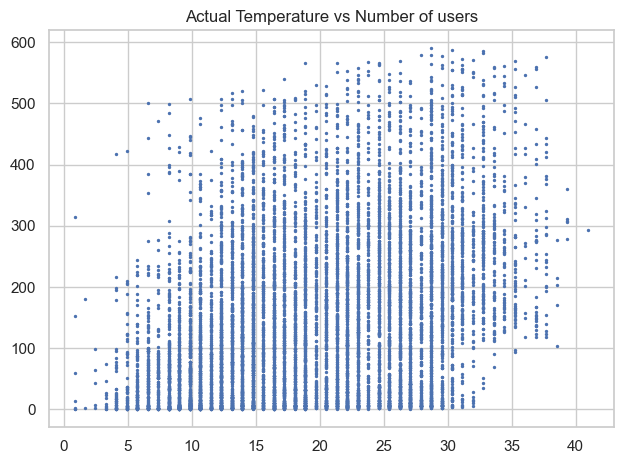

In [86]:
from matplotlib.pyplot import scatter

title('Actual Temperature vs Number of users')
scatter(df['Actual_Temperature'],df['number_of_users'],s=2)
tight_layout()

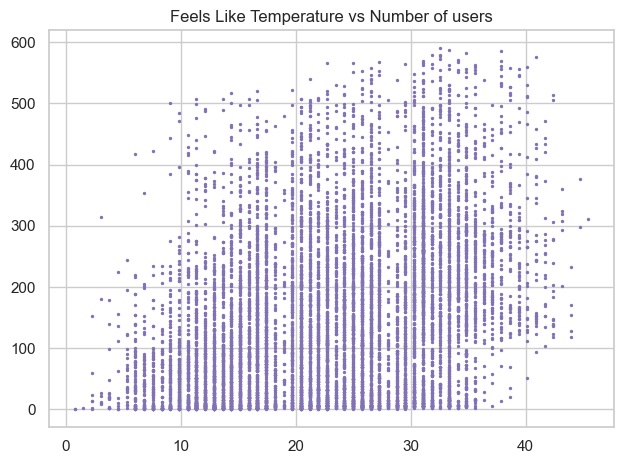

In [87]:
title('Feels Like Temperature vs Number of users')
scatter(df['Feels_Like_Temperature'],df['number_of_users'],s=2,c='m')
tight_layout()

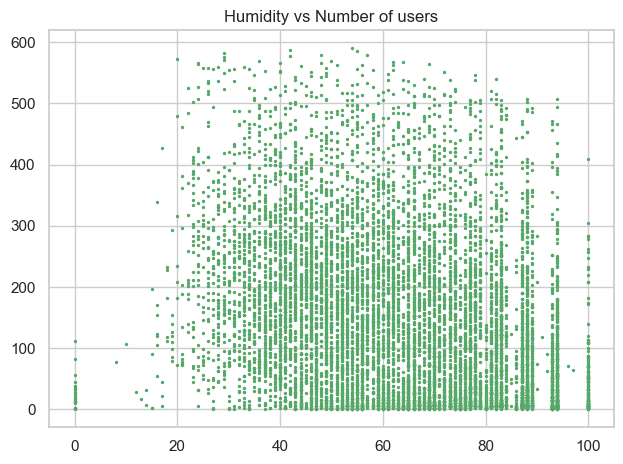

In [88]:
title('Humidity vs Number of users')
scatter(df['humidity'],df['number_of_users'],s=2,c='g')
tight_layout()

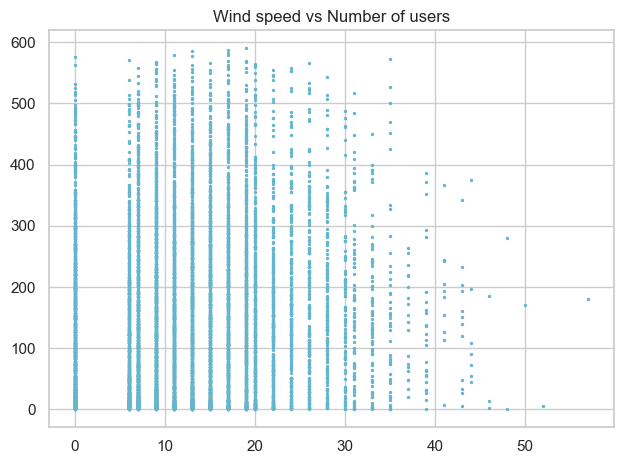

In [89]:
title('Wind speed vs Number of users')
scatter(df['windspeed'],df['number_of_users'],s=2,c='c')
tight_layout()

-----------------------

In [250]:
# !jupyter nbconvert --to html "Bake rental project.ipynb"